In [3]:
import pickle
import statsmodels.api as sm
import numpy as np
import json

In [4]:
ep_strat = []

with open('/home/user/github/portfolio-manager/BackTest/model_results/CNNStrategy,strategy_type=equalpercent.json', 'rb') as f:
    for l in f:
        if l.strip():
            ep_strat.append(json.loads(l))

In [5]:
equaldol_strat = []

with open('/home/user/github/portfolio-manager/BackTest/model_results/EqualDollarStrategy.json', 'rb') as f:
    for l in f:
        if l.strip():
            equaldol_strat.append(json.loads(l))

In [14]:
cnn_pvs = [x['pv'] for x in ep_strat]
equaldol_pvs = [x['pv'] for x in equaldol_strat]

In [15]:
cnn_pvs = cnn_pvs[252*3:]
equaldol_pvs = equaldol_pvs[252*3:]

In [16]:
cnn_pvs = np.array(cnn_pvs)
equaldol_pvs = np.array(equaldol_pvs)

In [17]:
cnn_rets = np.log(cnn_pvs[1:]/cnn_pvs[:-1])
equaldol_rets = np.log(equaldol_pvs[1:]/equaldol_pvs[:-1])

In [18]:
equaldol_rets.shape

(5825,)

In [19]:
cnn_rets.shape

(5825,)

In [20]:
equaldol_aug = sm.add_constant(equaldol_rets)
m = sm.OLS(cnn_rets, equaldol_aug).fit()

In [21]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 5.399e+04
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:53:28   Log-Likelihood:                 23567.
No. Observations:                5825   AIC:                        -4.713e+04
Df Residuals:                    5823   BIC:                        -4.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   5.55e-05      2.090      0.037    7.21e-06       0.000
x1             1.0042      0.004    232.347      0.000       0.996       1.013
==============================================================================
Omnibus:                      778.669   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10087.739
Skew:                           0.040   Prob(JB):                         0.00
Kurtosis:                       9.446   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
residuals = cnn_rets - equaldol_rets * 1.0042

In [23]:
np.cumsum(residuals)

array([-0.00182458,  0.00831156,  0.015427  , ...,  0.67647369,
        0.67799799,  0.67592906])

In [24]:
import matplotlib.pyplot as plt

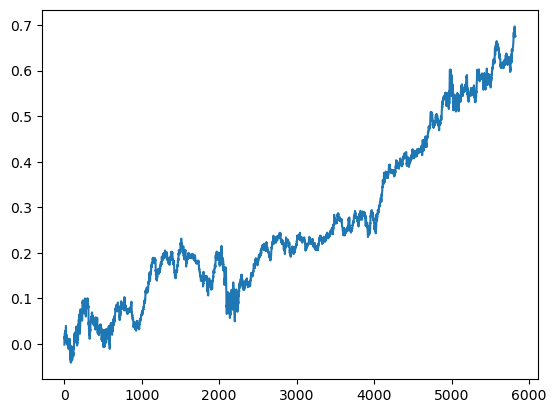

In [26]:
plt.plot(np.cumsum(residuals))

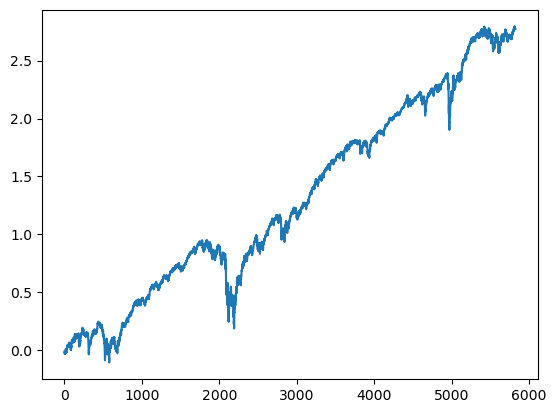

In [45]:
plt.plot(np.cumsum(equaldol_rets))

In [53]:
np.exp(0.5)

1.6487212707001282